In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def compute_std_dev(accuracy):
    def compute_std_dev_ind(accs):
        mean = np.mean(accs)
        std_dev = np.std(accs)
        return np.array([mean - std_dev, mean + std_dev])

    std_dev = np.apply_along_axis(compute_std_dev_ind, 0, accuracy)
    return std_dev

In [3]:
single_model_methods = [
    "random",
    "good_random",
    "entropy",
    "uncertainty",
    "crowdlab",
]

ensemble_methods = [
    "disagreement",
    "crowdlab_ensemble",
]

model = "mlp"

In [4]:
method_name_map = {
    "random": "Random",
    "good_random": "Good Random",
    "entropy": "Entropy",
    "uncertainty": "Uncertainty",
    "crowdlab": "Active CROWDLAB",
    "disagreement": "Disagrement (ensemble)",
    "crowdlab_ensemble": "Active CROWDLAB (ensemble)"
}

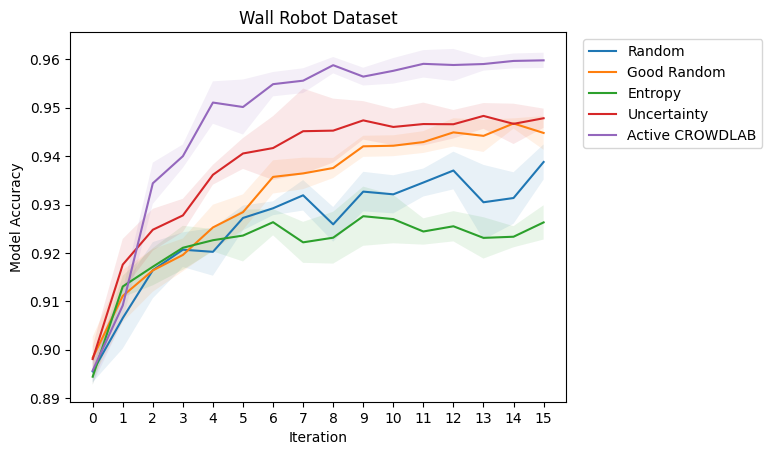

In [5]:
for method in single_model_methods:
    model_accuracy = np.array([np.load(f"results/{model}/{f}") for f in os.listdir(f"results/{model}/") if ".npy" in f and f.startswith(f"{method}_model_accuracy")])[:, :16]
    model_accuracy_std = compute_std_dev(model_accuracy)

    plt.plot(range(model_accuracy.shape[1]), np.mean(model_accuracy, axis=0), label=method_name_map[method])
    plt.fill_between(range(model_accuracy.shape[1]), model_accuracy_std[0], model_accuracy_std[1], alpha=0.1)
    
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Model Accuracy")
plt.xticks(range(model_accuracy.shape[1]))
plt.title("Wall Robot Dataset")
plt.show()

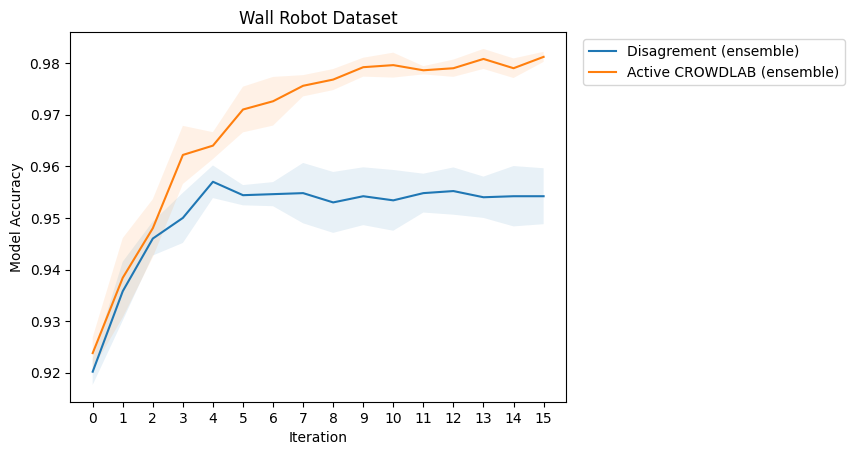

In [6]:
for method in ensemble_methods:
    model_accuracy = np.array([np.load(f"results/{model}/{f}") for f in os.listdir(f"results/{model}/") if ".npy" in f and f.startswith(f"{method}_model_accuracy")])[:, :16]
    model_accuracy_std = compute_std_dev(model_accuracy)

    plt.plot(range(model_accuracy.shape[1]), np.mean(model_accuracy, axis=0), label=method_name_map[method])
    plt.fill_between(range(model_accuracy.shape[1]), model_accuracy_std[0], model_accuracy_std[1], alpha=0.1)
    
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Model Accuracy")
plt.xticks(range(model_accuracy.shape[1]))
plt.title("Wall Robot Dataset")
plt.show()

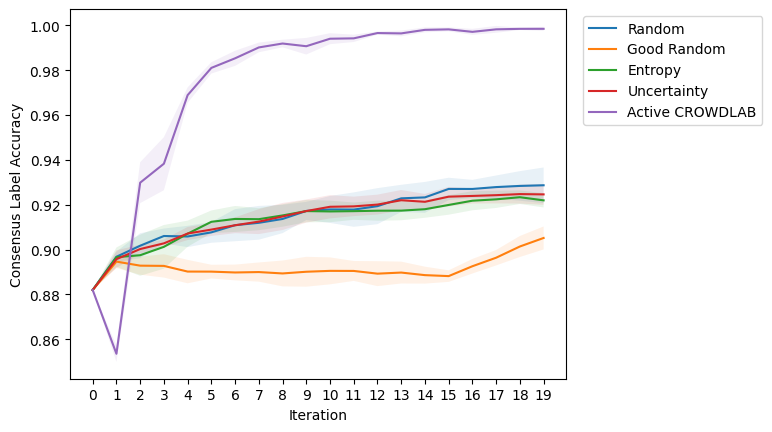

In [7]:
for method in single_model_methods:
    accuracy = np.array([np.load(f"results/{model}/{f}") for f in os.listdir(f"results/{model}/") if ".npy" in f and f.startswith(f"{method}_accuracy")])
    accuracy_std = compute_std_dev(accuracy)

    plt.plot(range(accuracy.shape[1]), np.mean(accuracy, axis=0), label=method_name_map[method])
    plt.fill_between(range(accuracy.shape[1]), accuracy_std[0], accuracy_std[1], alpha=0.1)

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Consensus Label Accuracy")
plt.xticks(range(accuracy.shape[1]))
plt.show()

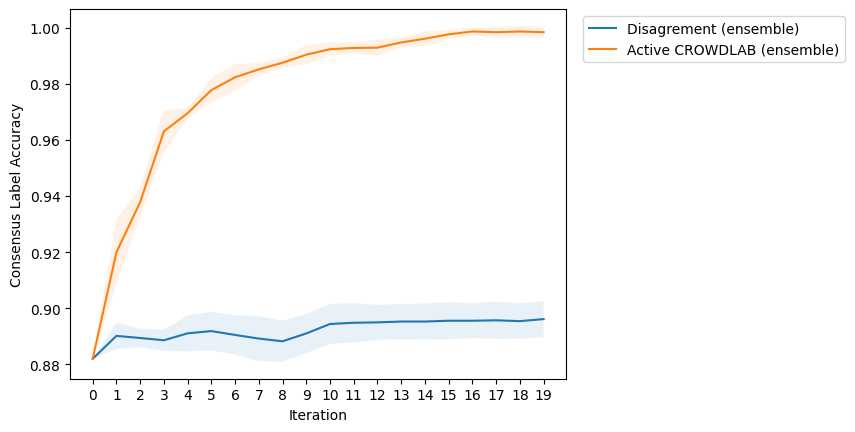

In [8]:
for method in ensemble_methods:
    accuracy = np.array([np.load(f"results/{model}/{f}") for f in os.listdir(f"results/{model}/") if ".npy" in f and f.startswith(f"{method}_accuracy")])
    accuracy_std = compute_std_dev(accuracy)

    plt.plot(range(accuracy.shape[1]), np.mean(accuracy, axis=0), label=method_name_map[method])
    plt.fill_between(range(accuracy.shape[1]), accuracy_std[0], accuracy_std[1], alpha=0.1)

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Consensus Label Accuracy")
plt.xticks(range(accuracy.shape[1]))
plt.show()